In [1]:
import gensim
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
import scipy.io
from sklearn.linear_model import LogisticRegression

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format('/home/t-kato/Dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)
vocab = array(list(model.vocab.keys()))
v_all = model[vocab] # 3000000x300

#savez_compressed('GoogleNews-vectors-negative300.npz', model=model[vocab], vocab=vocab)
#savemat('GoogleNews-vectors-negative300.mat', dict(model=model[vocab], vocab=vocab), do_compression=True)

# ques = load('questions-words.npz')['questions'][()]
# words = ques['gram2-opposite']
# words = ques['capital-common-countries']

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format('/home/t-kato/Dataset/wiki-news-300d-1M.vec')
vocab = np.array(list(model.vocab.keys()))
v_all = model[vocab] # 3000000x300

#savez_compressed('GoogleNews-vectors-negative300.npz', model=model[vocab], vocab=vocab)
#savemat('GoogleNews-vectors-negative300.mat', dict(model=model[vocab], vocab=vocab), do_compression=True)

# ques = load('questions-words.npz')['questions'][()]
# words = ques['gram2-opposite']
# words = ques['capital-common-countries']

In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('~/Dataset/wiki.en.vec')
vocab = np.array(list(model.vocab.keys()))
v_all = model[vocab] # 3000000x300

#savez_compressed('GoogleNews-vectors-negative300.npz', model=model[vocab], vocab=vocab)
#savemat('GoogleNews-vectors-negative300.mat', dict(model=model[vocab], vocab=vocab), do_compression=True)

# ques = load('questions-words.npz')['questions'][()]
# words = ques['gram2-opposite']
# words = ques['capital-common-countries']

In [14]:
model.most_similar_cosmul(positive=['king', 'grandfather'])

[('grandson', 0.6580076217651367),
 ('father', 0.6419470906257629),
 ('uncle', 0.6389809250831604),
 ('son', 0.6370980143547058),
 ('nephew', 0.6281980872154236),
 ('stepgrandfather', 0.6111133098602295),
 ('grandfathers', 0.605654239654541),
 ('stepgrandson', 0.6038870811462402),
 ('brother', 0.6024376749992371),
 ('granddaughter', 0.6024040579795837)]

In [20]:
model.most_similar_cosmul(positive=['queen', 'mother'])

[('grandmother', 0.6522390246391296),
 ('stepmother', 0.6500634551048279),
 ('stepgrandmother', 0.630548357963562),
 ('aunt', 0.6271011829376221),
 ('gradmother', 0.6196193695068359),
 ('stepmothers', 0.6189488172531128),
 ('daughter', 0.610195517539978),
 ('queenmother', 0.6088898181915283),
 ('grandmotherly', 0.6073351502418518),
 ('princess', 0.6068316102027893)]

In [5]:
v_all.shape

(2519370, 300)

In [3]:
#単語をクラス毎に格納した辞書を作成
classes = dict()
f = open('/Users/kreutzer/Dataset/mikolov_analogy_task/questions-words.txt')
for line in f:
    if ':' in line:
        class_name = line.strip(' :\n')
        classes[class_name] = []
    else:
        classes[class_name].append(line.split())

In [9]:
train_words = []
for question in classes['family']:
    if question[0] != 'boy':
        break
    train_words.append(question)

In [10]:
train_words

[['boy', 'girl', 'brother', 'sister'],
 ['boy', 'girl', 'brothers', 'sisters'],
 ['boy', 'girl', 'dad', 'mom'],
 ['boy', 'girl', 'father', 'mother'],
 ['boy', 'girl', 'grandfather', 'grandmother'],
 ['boy', 'girl', 'grandpa', 'grandma'],
 ['boy', 'girl', 'grandson', 'granddaughter'],
 ['boy', 'girl', 'groom', 'bride'],
 ['boy', 'girl', 'he', 'she'],
 ['boy', 'girl', 'his', 'her'],
 ['boy', 'girl', 'husband', 'wife'],
 ['boy', 'girl', 'king', 'queen'],
 ['boy', 'girl', 'man', 'woman'],
 ['boy', 'girl', 'nephew', 'niece'],
 ['boy', 'girl', 'policeman', 'policewoman'],
 ['boy', 'girl', 'prince', 'princess'],
 ['boy', 'girl', 'son', 'daughter'],
 ['boy', 'girl', 'sons', 'daughters'],
 ['boy', 'girl', 'stepbrother', 'stepsister'],
 ['boy', 'girl', 'stepfather', 'stepmother'],
 ['boy', 'girl', 'stepson', 'stepdaughter'],
 ['boy', 'girl', 'uncle', 'aunt']]

In [11]:
train_words2 = []
train_words2.append(train_words[0][:2])
for words in train_words:
    train_words2.append(words[2:4])

In [12]:
train_words2

[['boy', 'girl'],
 ['brother', 'sister'],
 ['brothers', 'sisters'],
 ['dad', 'mom'],
 ['father', 'mother'],
 ['grandfather', 'grandmother'],
 ['grandpa', 'grandma'],
 ['grandson', 'granddaughter'],
 ['groom', 'bride'],
 ['he', 'she'],
 ['his', 'her'],
 ['husband', 'wife'],
 ['king', 'queen'],
 ['man', 'woman'],
 ['nephew', 'niece'],
 ['policeman', 'policewoman'],
 ['prince', 'princess'],
 ['son', 'daughter'],
 ['sons', 'daughters'],
 ['stepbrother', 'stepsister'],
 ['stepfather', 'stepmother'],
 ['stepson', 'stepdaughter'],
 ['uncle', 'aunt']]

In [15]:
noise_words = [random.choice(vocab) for i in range(len(train_words2))]

In [17]:
source_words = [i[0] for i in train_words2]
target_words = [i[1] for i in train_words2]

In [21]:
training_set = target_words + source_words + noise_words

In [24]:
labels = np.hstack((np.ones(len(target_words)), np.zeros(len(source_words)), np.zeros(len(noise_words))))

In [26]:
training_set = np.array(training_set)

In [29]:
training_set.shape

(69,)

In [30]:
vocab.shape

(3000000,)

In [204]:
list(vocab).index('man')

251

In [237]:
def contextOfLRCos(c, d, train_pairs):
    
    # create training set
    noise_words = [random.choice(vocab) for i in range(len(train_pairs))]
    source_words = [i[0] for i in train_pairs if i[0] != c]
    target_words = [i[1] for i in train_pairs if i[1] != d]
    training_set = target_words + source_words + noise_words
    labels = np.hstack((np.ones(len(target_words)), np.zeros(len(source_words)), np.zeros(len(noise_words))))
    training_set = np.array(training_set)
    
    # train the model
    training_vectors = model[training_set]
    regression_model = LogisticRegression(solver="liblinear",
                                      class_weight='balanced',
                                      C=1.0)
    fit_model = regression_model.fit(training_vectors, labels)

    # calculate probability of words and cosine similarity
    probability_of_words = fit_model.predict_proba(v_all)[:, 1].reshape(3000000, 1) * v_all

    
#     print(v_all)
#     print(probability_of_words)
        
    cosine1 = np.sum(model['king'] * v_all, axis=1) / (np.linalg.norm(model['king']) * np.linalg.norm(v_all, axis=1))
    cosine2 = np.sum(probability_of_words[list(vocab).index('king')] * v_all, axis=1) / (np.linalg.norm(probability_of_words[list(vocab).index('king')]) * np.linalg.norm(v_all, axis=1))
    
    return (vocab[np.argsort(cosine1)[::-1][:10]], vocab[np.argsort(cosine2)[::-1][:10]])
    

In [238]:
# context of LRCos words

train_words = []
a = classes[class_][0][0]
b = classes[class_][0][1]
train_words.append([a, b])
for question in classes[class_]:
    if question[0] != a:
        break
    train_words.append(question[2:4])


cosines = contextOfLRCos('man', 'woman', train_pairs=train_words)

In [239]:
cosines

(array(['king', 'kings', 'queen', 'monarch', 'crown_prince', 'prince',
        'sultan', 'ruler', 'princes', 'Prince_Paras'], dtype='<U98'),
 array(['king', 'kings', 'queen', 'monarch', 'crown_prince', 'prince',
        'sultan', 'ruler', 'princes', 'Prince_Paras'], dtype='<U98'))

In [12]:
def calculateLRCos(c, d, train_pairs):
    
    # create training set
    noise_words = [random.choice(vocab) for i in range(len(train_pairs))]
    source_words = [i[0] for i in train_pairs if i[0] != c]
    target_words = [i[1] for i in train_pairs if i[1] != d]
    training_set = target_words + source_words + source_words + source_words + source_words + noise_words
    labels = np.hstack((np.ones(len(target_words)), np.zeros(len(training_set) - len(target_words))))
    training_set = np.array(training_set)
    
    # train the model
    training_vectors = model[training_set]
    regression_model = LogisticRegression(solver="liblinear",
                                      class_weight='balanced',
                                      C=1.0)
    fit_model = regression_model.fit(training_vectors, labels)

    # calculate probability of words and cosine similarity
    probability_of_words = fit_model.predict_proba(v_all)[:, 1]
    cos = np.sum(model[c] * v_all, axis=1) / (np.linalg.norm(model[c]) * np.linalg.norm(v_all, axis=1))
    answer = vocab[np.argsort(probability_of_words * cos)[::-1]][0]
    return answer

In [10]:
def calculateLRCosReverse(c, d, train_pairs):
    
    # create training set
    noise_words = [random.choice(vocab) for i in range(len(train_pairs))]
    source_words = [i[1] for i in train_pairs if i[1] != c]
    target_words = [i[0] for i in train_pairs if i[0] != d]
    training_set = target_words + source_words + noise_words
    labels = np.hstack((np.ones(len(target_words)), np.zeros(len(source_words)), np.zeros(len(noise_words))))
    training_set = np.array(training_set)
    
    # train the model
    training_vectors = model[training_set]
    regression_model = LogisticRegression(solver="liblinear",
                                      class_weight='balanced',
                                      C=1.0)
    fit_model = regression_model.fit(training_vectors, labels)

    # calculate probability of words and cosine similarity
    probability_of_words = fit_model.predict_proba(v_all)[:, 1]
    cos = np.sum(model[d] * v_all, axis=1) / (np.linalg.norm(model[d]) * np.linalg.norm(v_all, axis=1))
    answer = vocab[np.argsort(probability_of_words * cos)[::-1]][0]
    return answer

In [235]:
correct_classes_reverse

[462, 3958, 465, 805, 467, 782, 528, 1233, 1001, 1023, 1599, 1474, 1318, 834]

In [10]:
# test accuracy of LRCos
# class_names = classes.keys()
correct_classes = []

for class_ in list(classes.keys()):
    i = 0
    corrects = 0
    train_words = []

    print(class_)
    
    class2 = np.array(classes[class_])
    a = classes[class_][0][0]
    b = classes[class_][0][1]
    train_words.append([a, b])
    print(train_words)
    for question in classes[class_]:
        # 重複がないように単語対を訓練セットに加えていく
        if question[0] != a:
            break
        train_words.append(question[2:4])
        print(train_words)

    for question in classes[class_]:
        ans = calculateLRCos(question[2], question[3], train_pairs=train_words)
        corrects += (ans == question[3])
        i += 1
        if corrects % 50 == 0:
            print(i, corrects/(i+1))
    correct_classes.append(corrects)

capital-common-countries
[['Athens', 'Greece']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China'], ['Berlin', 'Germany']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China'], ['Berlin', 'Germany'], ['Bern', 'Switzerland']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China'], ['Berlin', 'Germany'], ['Bern', 'Switzerland'], ['Cairo', 'Egypt']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China'], ['Berlin', 'Germany'], ['Bern', 'Switzerland'], ['Cairo', 'Egypt'], ['Canberra', 'Australia']]
[['Athens', 'Greece'], ['Baghdad', 'Iraq'], ['Bangkok', 'Thailand'], ['Beijing', 'China'], ['Berlin', 'Germany'], ['Bern', 'Switzerland'], ['Cairo', '

NameError: name 'calculateLRCos' is not defined

In [9]:
class2[:, 0]
class2[:, 1]

array(['Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece',
       'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece',
       'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece',
       'Greece', 'Greece', 'Greece', 'Greece', 'Iraq', 'Iraq', 'Iraq',
       'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq',
       'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq', 'Iraq',
       'Iraq', 'Iraq', 'Iraq', 'Thailand', 'Thailand', 'Thailand',
       'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand',
       'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand',
       'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand',
       'Thailand', 'Thailand', 'Thailand', 'Thailand', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'Germany',
       'Germany', 'Germany', 'Ger

In [199]:
# test accuracy of LRCosReverse
class_names = classes.keys()
correct_classes_reverse = []

for class_ in list(classes.keys()):
    i = 0
    corrects = 0
    train_words = []

    print(class_)
    
    a = classes[class_][0][0]
    b = classes[class_][0][1]
    train_words.append([a, b])
    for question in classes[class_]:
        if question[0] != a:
            break
        train_words.append(question[2:4])

    for question in classes[class_]:
        ans = calculateLRCosReverse(question[2], question[3], train_pairs=train_words)
        corrects += (ans == question[2])
        i += 1
        if corrects % 50 == 0:
            print(i, corrects/(i+1))
    correct_classes_reverse.append(corrects)

# for class_ in list(classes.keys())[4]:
# class_ = 'family'
# i = 0
# corrects = 0
# train_words = []

# print(class_)

# a = classes[class_][0][0]
# b = classes[class_][0][1]
# train_words.append([a, b])
# for question in classes[class_]:
#     if question[0] != a:
#         break
#     train_words.append(question[2:4])

# for question in classes[class_]:
#     ans = calculateLRCosReverse(question[2], question[3], train_pairs=train_words)
#     corrects += (ans == question[2])
#     i += 1
#     if corrects % 50 == 0:
#         print(i, corrects/(i+1))
# correct_classes.append(corrects)

capital-common-countries
56 0.8771929824561403
110 0.9009009009009009
163 0.9146341463414634
216 0.9216589861751152
217 0.9174311926605505
272 0.9157509157509157
328 0.9118541033434651
382 0.9138381201044387
438 0.9111617312072893
494 0.9090909090909091
capital-world
55 0.8928571428571429
113 0.8771929824561403
171 0.872093023255814
231 0.8620689655172413
232 0.8583690987124464
292 0.8532423208191127
352 0.8498583569405099
409 0.8536585365853658
467 0.8547008547008547
524 0.8571428571428571
582 0.8576329331046312
639 0.859375
698 0.8583690987124464
758 0.8563899868247694
820 0.8526187576126675
881 0.8503401360544217
941 0.8492569002123143
1002 0.847457627118644
1062 0.8466603951081844
1121 0.8467023172905526
1122 0.8459483526268923
1181 0.8460236886632826
1182 0.8453085376162299
1241 0.8454106280193237
1300 0.8455034588777863
1358 0.8462104488594555
1416 0.8468595624558928
1475 0.8468834688346883
1538 0.8447043534762833
1599 0.84375
1600 0.8432229856339788
1658 0.8438818565400844
1715 

In [194]:
def cosine_sim(a, b):
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return np.sum(a * b) / (norm_a * norm_b)

In [114]:
correct_classes2 = correct_classes

In [116]:
correct_classes

[462, 3917, 375, 2273, 440, 773, 592, 1228, 1056, 979, 1443, 1364, 1190, 716]

In [197]:
correct_classes

[462,
 3917,
 375,
 2273,
 440,
 773,
 592,
 1228,
 1056,
 979,
 1443,
 1364,
 1190,
 716,
 470]

In [ ]:
# test the accuracy of reverse operation of LRCos



In [2]:
def doAnalogy(model=model, analogs=[], cst=0, honest=False):
    classes_corrects = []
    tops = []
    dim = 300
    for _class in analogs:
        print(_class)
        V_a = []
        V_b = []
        V_c = []
        V_d = []
        abc = []
        correct_ans = []

        for question in classes[_class]:
            try:
                a = model[question[0]]
                b = model[question[1]]
                c = model[question[2]]
                d = model[question[3]]
                abc.append([question[0], question[1], question[2]])
                correct_ans.append(question[3])
                V_a.append(a)
                V_b.append(b)
                V_c.append(c)
                V_d.append(d)
            except KeyError as e:
                #             print(e)
                continue

        abc = np.array(abc)
        V_a = np.array(V_a)
        V_b = np.array(V_b)
        V_c = np.array(V_c)
        V_d = np.array(V_d)
        print(V_a.shape)

        V_man = V_a - V_c
        V_woman = V_b - V_d

        N = len(classes[_class])
        correctq = []
        w_vall = []
        X_w = []
        correct = 0
        for i in range(dim):
            a = np.max(np.abs(V_man[:, i]))
            b = np.max(np.abs(V_woman[:, i]))
            ep = np.linalg.norm(V_man[:, i] - V_woman[:, i])
#             print(np.linalg.norm(V_man[:, i] - V_woman[:, i]))
#             print(ep)
#             print(a)
#             print((V_man[:, i] - V_woman[:, i]))
            w = np.exp(cst * (a + b - ep))
#             print(w)
#             w = 1
            w_vall.append(w * v_all[:, i])
            X_w.append(w * (V_c[:, i] - V_a[:, i] + V_b[:, i]))
        X_w = np.array(X_w).T
        w_vall = np.array(w_vall).T
        norm_all = np.linalg.norm(w_vall, axis=1)
        for i in range(N):
#             cos_a = np.sum(V_a[i] * w_vall, axis=1) / \
#                 (np.linalg.norm(V_a[i]) * norm_all)
#             cos_b = np.sum(V_b[i] * w_vall, axis=1) / \
#                 (np.linalg.norm(V_b[i]) * norm_all)
#             cos_c = np.sum(V_c[i] * w_vall, axis=1) / \
#                 (np.linalg.norm(V_c[i]) * norm_all)

#             cos_add = cos_c - cos_a + cos_b
            cos = np.sum(X_w[i] * w_vall, axis=1) / (np.linalg.norm(X_w[i]) * np.linalg.norm(w_vall, axis=1))
            if not honest:
                tops.append(vocab[np.argsort(cos)[::-1][:20]])
                for word in vocab[np.argsort(cos)[::-1][:4]]:
                    if word in abc[i, :]:
                        continue
                    correct += (correct_ans[i] == word)
#                     if (correct_ans[i] == word):
#                         correctq.append(True)
#                     else:
#                         correctq.append(False)
            else:
                correct += (correct_ans[i] == vocab[np.argsort(cos)[::-1][0]])
#             print(np.argsort(cos_add)[::-1][0])
#                 break
            if correct % 50 == 0:
                print(correct / (i+1))
                print(correct_ans[i], vocab[np.argsort(cos)[::-1][:10]], i)
#         correct_rate.append(correct)
        classes_corrects.append(correct)
    return classes_corrects, tops

NameError: name 'model' is not defined

In [ ]:
training_vectors = model[training_set]

In [ ]:
regression_model = LogisticRegression(solver="liblinear",
                                      class_weight='balanced',
                                      C=1.0)

In [ ]:
fit_model = regression_model.fit(training_vectors, labels)

In [ ]:
probability_of_words = fit_model.predict_proba(v_all)[:, 1]

In [ ]:
ranking_probability = vocab[np.argsort(probability_of_words)[::-1]]

In [ ]:
ranking_probability = []

In [ ]:
cos.shape

In [ ]:
probability_of_words * cos

In [ ]:
cos = np.sum(model['uncle'] * v_all, axis=1) / (np.linalg.norm(model['uncle']) * np.linalg.norm(v_all, axis=1))

In [ ]:
vocab[np.argsort(probability_of_words * cos)[::-1]][:10]

In [118]:
len(correct_classes)

14

In [7]:
class_length = [len(classes[k]) for k in list(classes.keys())]

In [131]:
correct_rates = [k/i for i,k in zip(class_length, correct_classes)]

In [132]:
correct_rates

[0.9130434782608695,
 0.8658267020335986,
 0.4330254041570439,
 0.9213619781110661,
 0.8695652173913043,
 0.7792338709677419,
 0.729064039408867,
 0.9219219219219219,
 0.9411764705882353,
 0.9270833333333334,
 0.9024390243902439,
 0.8743589743589744,
 0.8933933933933934,
 0.8229885057471265]

In [136]:
import seaborn as sns

In [147]:
tips = sns.load_dataset("tips")

In [145]:
correct_rates = np.array(correct_rates)

In [151]:
sns.set(style='whitegrid')
ax = sns.barplot(x="categories", y="accuracy", data=tips)

ValueError: Could not interpret input 'categories'

In [153]:
correct_rates2 = [1.0,
 0.882183908045977,
 0.5323325635103926,
 0.55776246453182,
 0.9782608695652174,
 0.6502016129032258,
 0.6884236453201971,
 0.9504504504504504,
 0.9714795008912656,
 0.9232954545454546,
 0.9393370856785491,
 0.8275641025641025,
 0.996996996996997,
 0.9275862068965517]

In [162]:
import pandas as pd

rates_data = pd.DataFrame([correct_rates, correct_rates2], columns=list(range(len(correct_rates))), index=['LRCos', 'Adaptive weighting'])

In [163]:
rates_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
LRCos,0.913043,0.865827,0.433025,0.921362,0.869565,0.779234,0.729064,0.921922,0.941176,0.927083,0.902439,0.874359,0.893393,0.822989
Adaptive weighting,1.000000,0.882184,0.532333,0.557762,0.978261,0.650202,0.688424,0.950450,0.971480,0.923295,0.939337,0.827564,0.996997,0.927586


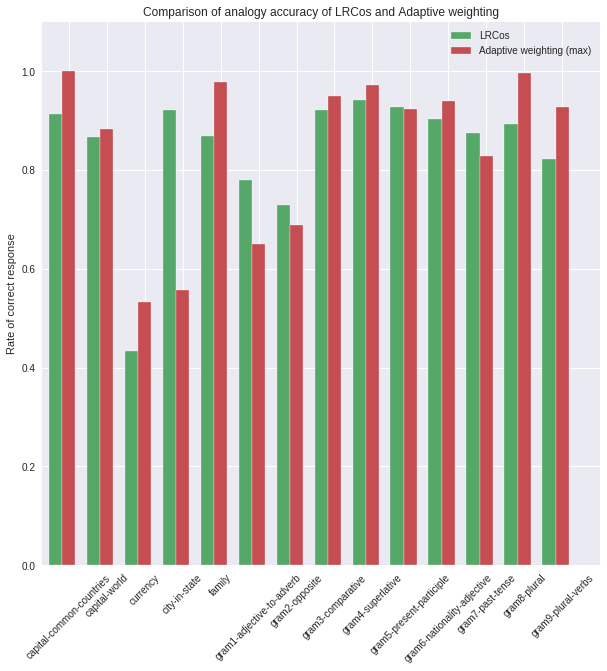

In [186]:
# sns.set(style='whitegrid')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.style.use('seaborn')
# plt.figure(figsize=(10, 10))
ind = np.arange(len(correct_rates))                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, correct_rates, width,
                color='C1')

rects2 = ax.bar(ind+width, correct_rates2, width,
                    color='C2')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1.1)
ax.set_ylabel('Rate of correct response')
ax.set_title('Comparison of analogy accuracy of LRCos and Adaptive weighting')
xTickMarks = list(classes.keys())
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.legend(['LRCos', 'Adaptive weighting (max)'])

# plt.show()

plt.savefig('lrcos_comparison.png', bbox_inches='tight')

In [9]:
### LRCos reverse

lrcos_reverse = [462, 3958, 465, 805, 467, 782, 528, 1233, 1001, 1023, 1599, 1474, 1318, 834]

### Mikolov reverse max

mik_reverse_max = [486, 3070, 668, 532, 496, 605, 575, 1240, 1067, 984, 1599, 1393, 1306, 759]

### Mikolov reverse

mik_reverse = [438, 3931, 537, 678, 461, 396, 394, 1201, 971, 921, 1590, 1395, 1206, 699]

In [10]:
# normalize scores
norm_lrcos_reverse = [score / length for length, score in zip(class_length, lrcos_reverse)]
norm_mik_reverse_max = [score / length for length, score in zip(class_length, mik_reverse_max)]
norm_mik_reverse = [score / length for length, score in zip(class_length, mik_reverse)]

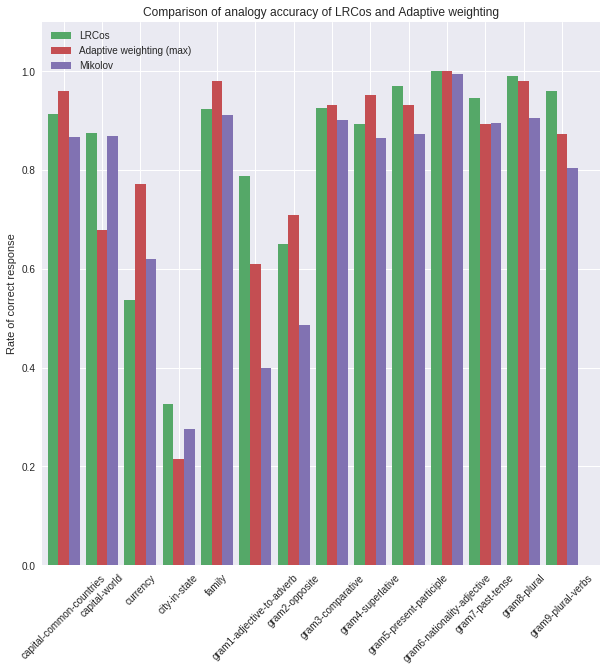

In [16]:
# sns.set(style='whitegrid')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.style.use('seaborn')
# plt.figure(figsize=(10, 10))
ind = np.arange(len(norm_lrcos_reverse))                # the x locations for the groups
width = 0.28                      # the width of the bars

## the bars
rects1 = ax.bar(ind, norm_lrcos_reverse, width,
                color='C1')

rects2 = ax.bar(ind+width, norm_mik_reverse_max, width,
                    color='C2')
rects3 = ax.bar(ind+width*2, norm_mik_reverse, width,
                    color='C3')


# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1.1)
ax.set_ylabel('Rate of correct response')
ax.set_title('Comparison of analogy accuracy of LRCos and Adaptive weighting')
xTickMarks = list(classes.keys())
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.legend(['LRCos', 'Adaptive weighting (max)', 'Mikolov'])

# plt.show()

plt.savefig('lrcos_comparison_reverse.png', bbox_inches='tight')